# Teletrabajo en Ecuador: ¿Llegó para quedarse?
## Problame a resolver
Comprender cómo la pandemia ha incrementado la tendencia hacia la modalidad de teletrabajo en Ecuador durante y después de la pandemia.
## Objetivos 
- Comprender en qué medida el teletrabajo se convirtió en una modalidad en crecimiento en Ecuador durante la pandemia.
- Analizar cómo el teletrabajo se incrementó con el paso del tiempo y qué sucedió después de la pandemia.
- Identificar en qué ciudades de Ecuador aumentó el teletrabajo y en cuáles no.


In [1]:
# API docs: http://docs.ckan.org/en/2.9/api/
# Ingesta de datos
import requests
import os 
import json

# Ingesta de datos

In [24]:
# Carpeta para la ingesta de datos
folder_path = "../data/data_analytics_01Project/"
os.makedirs(folder_path, exist_ok=True)

Datos abiertos EC contiene grupos de datos, cada grupo de dato contiene `raw data` y data contextual

In [25]:
def requests_data(group_name:str)->dict:
    """ Solicita un conjunto de datos a la API basado
    en el nombre del grupo

    Args:
        group_name (str): Nombre del grupo de datos

    Returns:
        dict: Respuesta de la API
    """
    query = group_name
    try:
        response = requests.get(f"https://datosabiertos.gob.ec/api/3/action/package_search?q={query}")
        response.raise_for_status()  # Raise an exception for any HTTP error status codes
        data = response.json()
        return data

    except requests.exceptions.RequestException as e:
        # Handle connection errors, timeouts, and other errors related to the request itself
        print("An error occurred:", e)
    except requests.exceptions.HTTPError as e:
        # Handle HTTP error status codes
        print("HTTP error occurred:", e)

# Llama a la funcion y lista los posibles grupos de datos
data = requests_data("teletrabajo")
number_of_suggestions = len(data["result"]["results"])
for i in range(0, number_of_suggestions):
    print(json.dumps(data["result"]["results"][i]["name"],indent = 4, sort_keys = True))

"teletrabajo"


In [27]:
def download_dataset_files(dataset_name, folder_path):
    # Query the API
    data = requests_data(dataset_name)

    if data is None:
        return

    # Working with JSON File
    resources = data["result"]["results"][0]["resources"]
    print("Nombre del conjunto:", dataset_name, "\n")

    [download_resource(index, resource, folder_path) for index, resource in enumerate(resources)]

def download_resource(index, resource, folder_path):
    print("\n")
    print('Recurso numero:', index)

    file_name = resource["name"]
    print("Nombre:", file_name)

    # Resource link
    link = resource["url"]
    # Formatted the link
    formatted_link = str(link).replace('"', '')

    # Download the data
    response = requests.get(formatted_link)
    response.raise_for_status()  # Raise an exception if the download fails

    file_path = os.path.join(folder_path, formatted_link[formatted_link.find('download') + 9:])
    with open(file_path, 'wb') as file:
        file.write(response.content)

    print('Datos descargados.')

In [28]:
dataset_name = "teletrabajo"
download_dataset_files(dataset_name,folder_path)

Nombre del conjunto: teletrabajo 



Recurso numero: 0
Nombre: FichaMetodologicaTeletrabajo
Datos descargados.


Recurso numero: 1
Nombre: MDT_Teletrabajo_2023Abril
Datos descargados.


Recurso numero: 2
Nombre: MDT_Teletrabajo_DD_2022Marzo
Datos descargados.


Recurso numero: 3
Nombre: MDT_Teletrabajo_PM_2022Marzo
Datos descargados.


# Descripción de los datos

In [41]:
import pandas as pd 
import pyexcel as pe

In [29]:
%ls "../data/data_analytics_01Project/"

ficha-metodologica-teletrabajo.pdf  mdt_teletrabajo_dd_2022marzo.ods
mdt_teletrabajo_2023abril.csv       mdt_teletrabajo_pm_2022marzo.ods


`ficha-metodologica-teletrabajo.pdf`: Contiene los detalles de la metologia utilizada






`mdt_teletrabajo_dd_2022marzo.ods`: Contiene la desagregacion de la informacion que se encuentra en la base de datos.

In [47]:
df_temp = pe.get_book(file_name="../data/data_analytics_01Project/mdt_teletrabajo_dd_2022marzo.ods")
df_temp

Hoja1:
+------------------------------+-------------------------------------------------------------------------------------------------------------+
| Institución                  | Ministerio del Trabajo                                                                                      |
+------------------------------+-------------------------------------------------------------------------------------------------------------+
| Identificador                | DD-11-2021Agosto                                                                                            |
+------------------------------+-------------------------------------------------------------------------------------------------------------+
| Documento Referencia         | MDT_Teletrabajo_DD_2021Agosto                                                                               |
+------------------------------+-------------------------------------------------------------------------------------------------------

`mdt_teletrabajo_pm_2022marzo.ods`: Contiene las caracteristicas de la base de datos.

In [48]:
df_temp = pe.get_book(file_name="../data/data_analytics_01Project/mdt_teletrabajo_pm_2022marzo.ods")
df_temp

Hoja1:
+-----------------------------+-------------------------------------------------------------------------------------------------------------+
| Institución                 | Ministerio del Trabajo                                                                                      |
+-----------------------------+-------------------------------------------------------------------------------------------------------------+
| Identificador               | PM-11-2021Agosto                                                                                            |
+-----------------------------+-------------------------------------------------------------------------------------------------------------+
| Documento Referencia        | MDT_Teletrabajo_PM_2021Agosto                                                                               |
+-----------------------------+-------------------------------------------------------------------------------------------------------------+


`mdt_teletrabajo_2023abril.cvs` : Numero de contratos bajo la modalidad de teletrabajo

In [50]:
df_2023 = pd.read_csv("../data/data_analytics_01Project/mdt_teletrabajo_2023abril.csv", delimiter = ";")
df_2023

,Motivo Teletrabajo,Provincia Contrato (grupo),Finalizado,Provincia Contrato,Contratos
0,Emergente,PICHINCHA,Finalizado,PICHINCHA,3
1,Emergente,SANTO DOMINGO DE LOS TSÁCHILAS,Finalizado,SANTO DOMINGO DE LOS TSÁCHILAS,1
2,Emergente,PICHINCHA,Finalizado,PICHINCHA,1
3,Habitual,MANABI,Finalizado,MANABI,2
4,Emergente,TUNGURAHUA,Vigente,TUNGURAHUA,1
...,...,...,...,...,...
49212,Habitual,PICHINCHA,Finalizado,PICHINCHA,2
49213,Habitual,LOS RIOS,Finalizado,LOS RIOS,1
49214,Habitual,PICHINCHA,Finalizado,PICHINCHA,1
49215,Habitual,PICHINCHA,Finalizado,PICHINCHA,3


Las columnas para la data descargada son las siguientes:

In [51]:
df_2023.columns

Index(['Motivo Teletrabajo', 'Provincia Contrato (grupo)', 'Finalizado',
       'Provincia Contrato', 'Contratos'],
      dtype='object')

## Columnas faltantes
Las columnas que se presentan no son las que la que se encuentran en los documentos informativos. 
Según https://www.datosabiertos.gob.ec/dataset/teletrabajo/resource/22f89800-e35b-4c0b-a73f-b4f006994f18 estaos datos tiene las siguientes fechas: 
### Fecha de actualización
- 11 de mayo de 2023

### Fecha de creación
- 17 de agosto de 2021

Sin embargo datos descargados anteriormente, muestran cortes en los siguientes años:

In [54]:
url = "https://raw.githubusercontent.com/matardy/datos-abiertos-ec-API/master/data/teletrabajo/mdt_teletrabajo_2022mayo.csv"
df_until_2022 = pd.read_csv(url, delimiter = ";")
df_until_2022


,motivo_teletrabajo,genero,provincia_contrato,provincia_contrato (grupo),finalizado,contratos,anio_fecha_inicio_teletrabajo,anio_fecha_inicio_teletrabajo (grupo),canton_contrato,estado_teletrabajo,fecha_consulta,mes_fecha_inicio_teletrabajo,modo_ejecucion,Número de registros,ruc_empresa
0,Emergente,Femenino,PICHINCHA,PICHINCHA,Vigente,1,2017,Otro,QUITO,Activo,1/6/2022 04:49:26,1.0,Teletrabajo,1,1792040825001
1,Emergente,Femenino,PICHINCHA,PICHINCHA,Vigente,1,2018,Otro,QUITO,Activo,1/6/2022 04:49:26,4.0,Teletrabajo,1,1792692091001
2,Emergente,Femenino,PICHINCHA,PICHINCHA,Vigente,1,2018,Otro,QUITO,Activo,1/6/2022 04:49:26,11.0,Teletrabajo,1,1791109384001
3,Emergente,Femenino,GUAYAS,GUAYAS,Vigente,4,2019,Otro,GUAYAQUIL,Activo,1/6/2022 04:49:26,2.0,Teletrabajo,1,1791256115001
4,Emergente,Femenino,PICHINCHA,PICHINCHA,Vigente,24,2019,Otro,QUITO,Activo,1/6/2022 04:49:26,2.0,Teletrabajo,1,1791256115001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46059,Habitual,Masculino,PICHINCHA,PICHINCHA,Finalizado,1,2022,Otro,QUITO,Activo,1/6/2022 04:49:26,4.0,Teletrabajo,1,1792825482001
46060,Habitual,Masculino,PICHINCHA,PICHINCHA,Finalizado,1,2022,Otro,QUITO,Activo,1/6/2022 04:49:26,4.0,Teletrabajo,1,1792983126001
46061,Habitual,Masculino,SANTO DOMINGO DE LOS TSÁCHILAS,SANTO DOMINGO DE LOS TSÁCHILAS,Finalizado,1,2022,Otro,SANTO DOMINGO DE LOS TSÁCHILAS,Activo,1/6/2022 04:49:26,4.0,Teletrabajo,1,1715337596001
46062,Habitual,Masculino,PICHINCHA,PICHINCHA,Finalizado,2,2022,Otro,QUITO,Activo,1/6/2022 04:49:26,5.0,Teletrabajo,1,1792758726001


In [56]:
# Corte hasta el 2022
df_until_2022['anio_fecha_inicio_teletrabajo'].unique()

array(['2017', '2018', '2019', '2020', '2021', '2022', 'Sin fecha',
       '2016'], dtype=object)

# Analisis de Datos

In [57]:
df_until_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46064 entries, 0 to 46063
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   motivo_teletrabajo                     46064 non-null  object 
 1   genero                                 46064 non-null  object 
 2   provincia_contrato                     46064 non-null  object 
 3   provincia_contrato (grupo)             46064 non-null  object 
 4   finalizado                             46064 non-null  object 
 5   contratos                              46064 non-null  int64  
 6   anio_fecha_inicio_teletrabajo          46064 non-null  object 
 7   anio_fecha_inicio_teletrabajo (grupo)  46064 non-null  object 
 8   canton_contrato                        46064 non-null  object 
 9   estado_teletrabajo                     46064 non-null  object 
 10  fecha_consulta                         46064 non-null  object 
 11  me

In [71]:
# Se eliminan columnas innecesarias para el analisis
columns_to_drop = ["ruc_empresa", "Número de registros", "fecha_consulta","provincia_contrato","anio_fecha_inicio_teletrabajo (grupo)","anio_fecha_inicio_teletrabajo (grupo)","estado_teletrabajo","modo_ejecucion","Número de registros"]
df_until_2022.drop(columns=columns_to_drop,index=1, inplace=True)

In [72]:
df_until_2022

,motivo_teletrabajo,genero,provincia_contrato (grupo),finalizado,contratos,anio_fecha_inicio_teletrabajo,canton_contrato,mes_fecha_inicio_teletrabajo
0,Emergente,Femenino,PICHINCHA,Vigente,1,2017,QUITO,1.0
2,Emergente,Femenino,PICHINCHA,Vigente,1,2018,QUITO,11.0
3,Emergente,Femenino,GUAYAS,Vigente,4,2019,GUAYAQUIL,2.0
4,Emergente,Femenino,PICHINCHA,Vigente,24,2019,QUITO,2.0
5,Emergente,Femenino,PICHINCHA,Vigente,1,2019,QUITO,2.0
...,...,...,...,...,...,...,...,...
46059,Habitual,Masculino,PICHINCHA,Finalizado,1,2022,QUITO,4.0
46060,Habitual,Masculino,PICHINCHA,Finalizado,1,2022,QUITO,4.0
46061,Habitual,Masculino,SANTO DOMINGO DE LOS TSÁCHILAS,Finalizado,1,2022,SANTO DOMINGO DE LOS TSÁCHILAS,4.0
46062,Habitual,Masculino,PICHINCHA,Finalizado,2,2022,QUITO,5.0


In [73]:
df_until_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46063 entries, 0 to 46063
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   motivo_teletrabajo             46063 non-null  object 
 1   genero                         46063 non-null  object 
 2   provincia_contrato (grupo)     46063 non-null  object 
 3   finalizado                     46063 non-null  object 
 4   contratos                      46063 non-null  int64  
 5   anio_fecha_inicio_teletrabajo  46063 non-null  object 
 6   canton_contrato                46063 non-null  object 
 7   mes_fecha_inicio_teletrabajo   39207 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 3.2+ MB


In [74]:
# Valores unicos por columna
for i in df_until_2022.columns:
    print("Columna: ",i)
    print(df_until_2022[i].unique())
    print()

Columna:  motivo_teletrabajo
['Emergente' 'Habitual']

Columna:  genero
['Femenino' 'Masculino']

Columna:  provincia_contrato (grupo)
['PICHINCHA' 'GUAYAS' 'EL ORO' 'SANTO DOMINGO DE LOS TSÁCHILAS' 'COTOPAXI'
 'AZUAY' 'BOLIVAR' 'CAÑAR' 'CARCHI' 'CHIMBORAZO' 'ESMERALDAS' 'GALÁPAGOS'
 'IMBABURA' 'LOJA' 'LOS RIOS' 'MANABI' 'MORONA SANTIAGO' 'NAPO' 'ORELLANA'
 'PASTAZA' 'SANTA ELENA' 'SUCUMBIOS' 'TUNGURAHUA' 'ZAMORA CHINCHIPE']

Columna:  finalizado
['Vigente' 'Finalizado']

Columna:  contratos
[  1   4  24   6   2  17   8   3  27   9  49  10  43   7  26  11  25   5
  32  21  16  15  23  34  12  59  13  14  18  39  41  36  29  55  84  63
  87 355  20  19  22  46  48  70 240  54 196  33  66 216  37 157  45  57
 135 106 112  93  98  28  30  72 100  50  38  35  52  81 138  44 612  56
  75  31 104  51 545  69 203  64  80  71  79  86  82 143  42  40 200  58
 101 197  94  62 341  76 175  53  97  47 114  60 194  92 266 181  90 140
  68 111 132  74 159 108  77  67 131 314 176 125 118 348 171 107 

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Analisis de genero

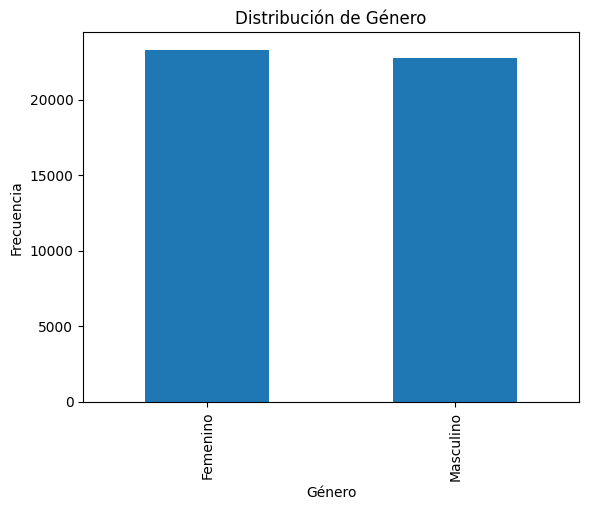

In [76]:
df_until_2022['genero'].value_counts().plot(kind='bar')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

## Analisis motivo de teletrabajo

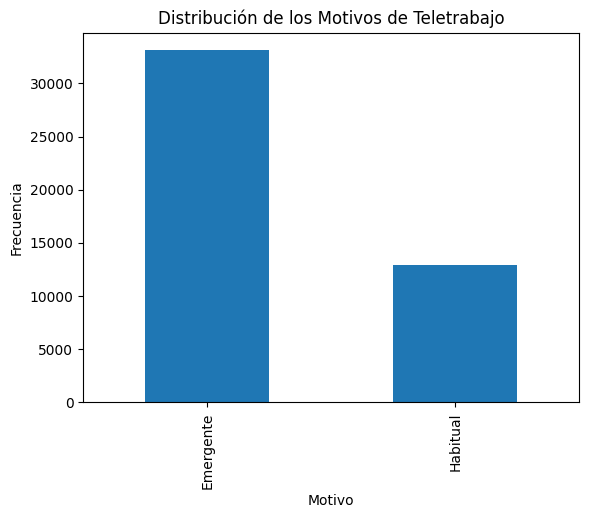

In [82]:
df_until_2022['motivo_teletrabajo'].value_counts().plot(kind='bar')
plt.title('Distribución de los Motivos de Teletrabajo')
plt.xlabel('Motivo')
plt.ylabel('Frecuencia')
plt.show()


### Analisis de motivo de teletrabajo tomando en cuenta los años y meses

/var/folders/j2/h8gpkp8n2hj612m9fs4ww7cw0000gn/T/ipykernel_57961/2627092504.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['anio_fecha_inicio_teletrabajo'] = df_filtered['anio_fecha_inicio_teletrabajo'].astype(int)
/var/folders/j2/h8gpkp8n2hj612m9fs4ww7cw0000gn/T/ipykernel_57961/2627092504.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['mes_fecha_inicio_teletrabajo'] = df_filtered['mes_fecha_inicio_teletrabajo'].astype(int)
/var/folders/j2/h8gpkp8n2hj612m9fs4ww7cw0000gn/T/i

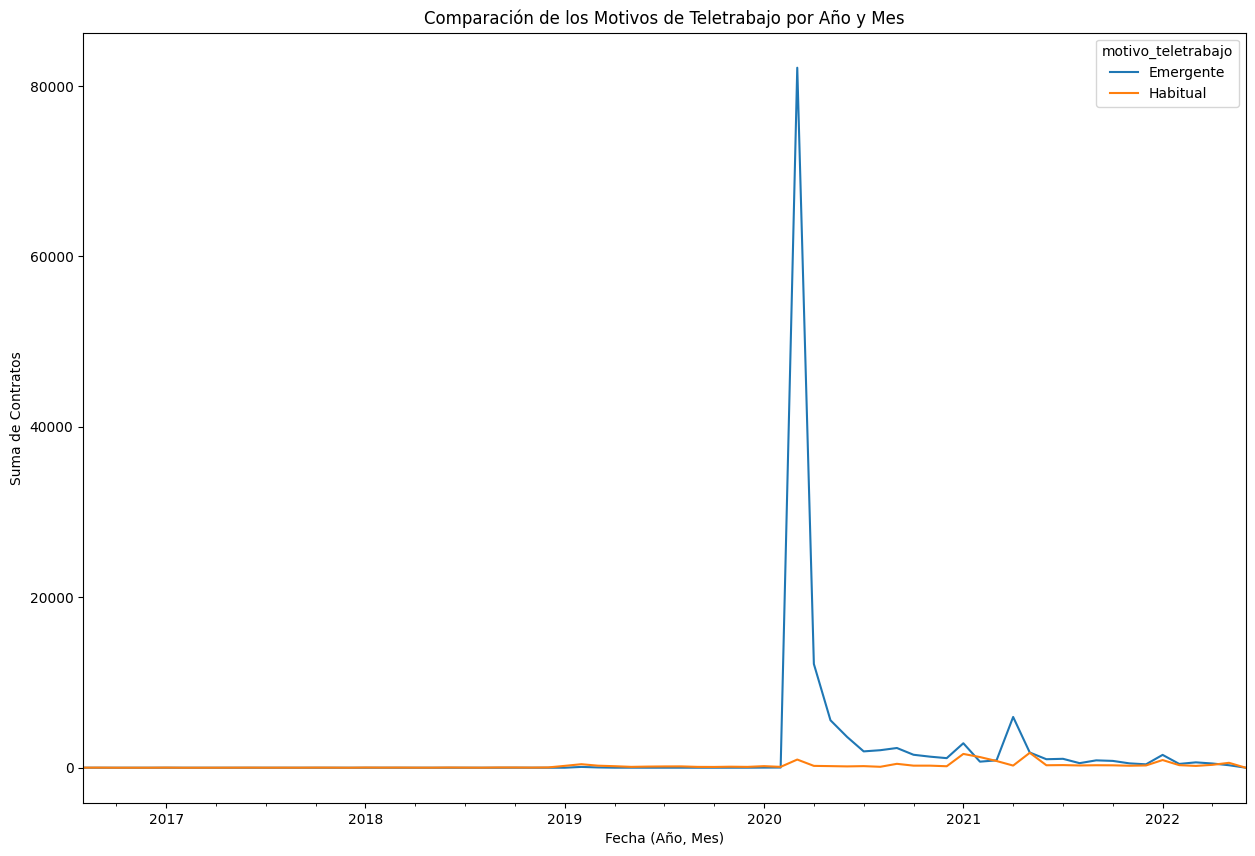

In [95]:
# Eliminamos las filas donde el año es 'Sin fecha' o el mes es nan
df_filtered = df_until_2022[(df_until_2022['anio_fecha_inicio_teletrabajo'] != 'Sin fecha') & (df_until_2022['mes_fecha_inicio_teletrabajo'].notna())]

# Convertimos los años y los meses a enteros
df_filtered['anio_fecha_inicio_teletrabajo'] = df_filtered['anio_fecha_inicio_teletrabajo'].astype(int)
df_filtered['mes_fecha_inicio_teletrabajo'] = df_filtered['mes_fecha_inicio_teletrabajo'].astype(int)

# Creamos una nueva columna con la fecha en formato de año-mes
df_filtered['fecha'] = df_filtered['anio_fecha_inicio_teletrabajo'].astype(str) + '-' + df_filtered['mes_fecha_inicio_teletrabajo'].astype(str).str.zfill(2)

# Convertimos la nueva columna a datetime
df_filtered['fecha'] = pd.to_datetime(df_filtered['fecha'])

# Creamos la tabla pivote
pivot_df = df_filtered.pivot_table(values='contratos', index='fecha', columns='motivo_teletrabajo', aggfunc='sum').fillna(0)

# Creamos el gráfico de líneas
pivot_df.plot(kind='line', figsize=(15,10))
plt.title('Comparación de los Motivos de Teletrabajo por Año y Mes')
plt.xlabel('Fecha (Año, Mes)')
plt.ylabel('Suma de Contratos')
plt.show()


Podemos observar claramente un ascenso en los inicios del 2020 y una rapida caida.

## Analisis por provincia

In [89]:
df_2023['Provincia Contrato (grupo)'].unique()

array(['PICHINCHA', 'SANTO DOMINGO DE LOS TSÁCHILAS', 'MANABI',
       'TUNGURAHUA', 'AZUAY', 'GUAYAS', 'COTOPAXI', 'ZAMORA CHINCHIPE',
       'MORONA SANTIAGO', 'CHIMBORAZO', 'IMBABURA', 'ESMERALDAS',
       'EL ORO', 'LOJA', 'SANTA ELENA', 'SUCUMBIOS', 'LOS RIOS',
       'ORELLANA', 'CAÑAR', 'CARCHI', 'GALÁPAGOS', 'BOLIVAR', 'NAPO',
       'PASTAZA'], dtype=object)

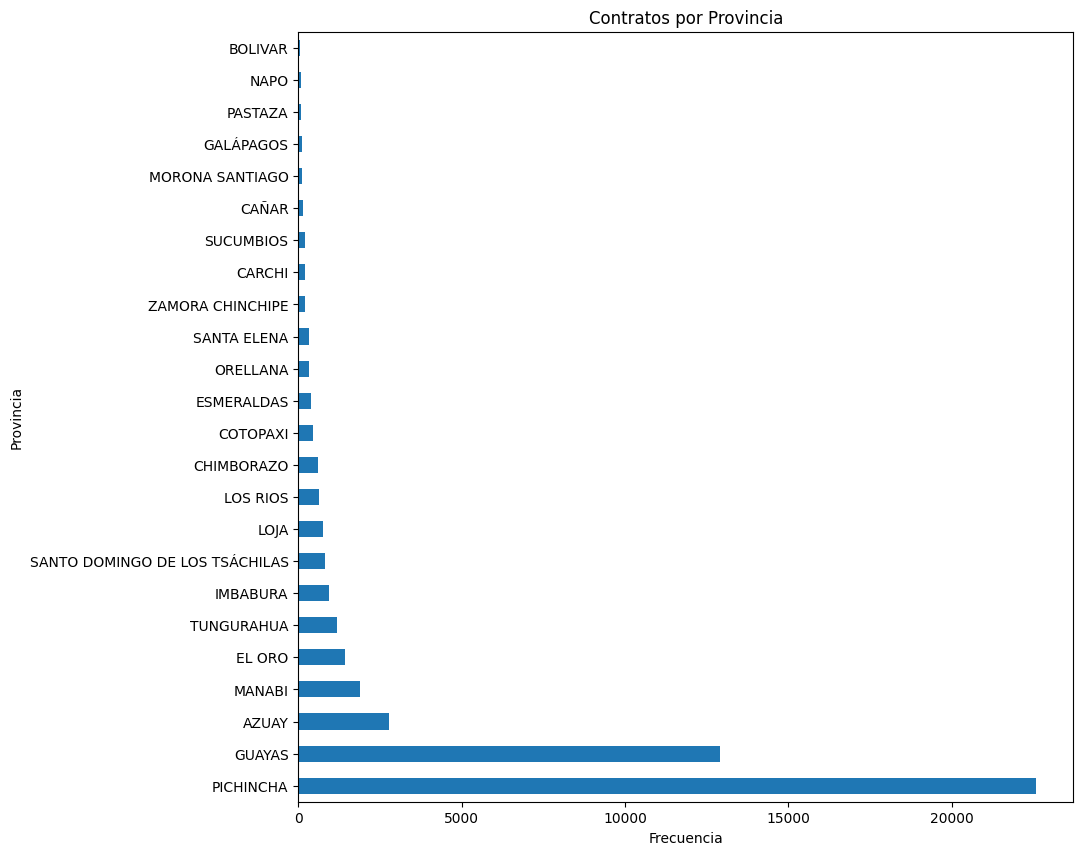

In [87]:
df_2023['Provincia Contrato (grupo)'].value_counts().plot(kind='barh', figsize=(10,10))
plt.title('Contratos por Provincia')
plt.xlabel('Frecuencia')
plt.ylabel('Provincia')
plt.show()


In [90]:
# Crear un dataframe con toda la información de la población
data = {
    'Provincia': ['PICHINCHA', 'SANTO DOMINGO DE LOS TSÁCHILAS', 'MANABI', 'TUNGURAHUA', 'AZUAY', 
                  'GUAYAS', 'COTOPAXI', 'ZAMORA CHINCHIPE', 'MORONA SANTIAGO', 'CHIMBORAZO',
                  'IMBABURA', 'ESMERALDAS', 'EL ORO', 'LOJA', 'SANTA ELENA', 'SUCUMBIOS', 'LOS RIOS',
                  'ORELLANA', 'CAÑAR', 'CARCHI', 'GALÁPAGOS', 'BOLIVAR', 'NAPO', 'PASTAZA'], 
    'Poblacion': [2777435, 396746, 1476727, 626781, 767727, 3930110, 441153, 98510, 159490, 494385,
                  647556, 575684, 484019, 401178, 161338, 27085, 838867, 62727, 197978, 177369, 
                  102988, 190249, 111793, 27085]
}

df_poblacion = pd.DataFrame(data)


In [97]:
# Primero, necesitamos agrupar el DataFrame de contratos de teletrabajo por provincia
df_teletrabajo_grouped = df_2023.groupby('Provincia Contrato (grupo)').count().reset_index()

# Renombrar las columnas para hacer el merge
df_teletrabajo_grouped = df_teletrabajo_grouped.rename(columns={'Provincia Contrato (grupo)': 'Provincia'})

# Combinar los dataframes
df_merged = pd.merge(df_teletrabajo_grouped, df_poblacion, on='Provincia')

df_merged.info()


,Provincia,Motivo Teletrabajo,Finalizado,Provincia Contrato,Contratos,Poblacion
0,AZUAY,2789,2789,2789,2789,767727
1,BOLIVAR,68,68,68,68,190249
2,CARCHI,197,197,197,197,177369
3,CAÑAR,154,154,154,154,197978
4,CHIMBORAZO,604,604,604,604,494385
5,COTOPAXI,455,455,455,455,441153
6,EL ORO,1441,1441,1441,1441,484019
7,ESMERALDAS,376,376,376,376,575684
8,GALÁPAGOS,102,102,102,102,102988
9,GUAYAS,12912,12912,12912,12912,3930110


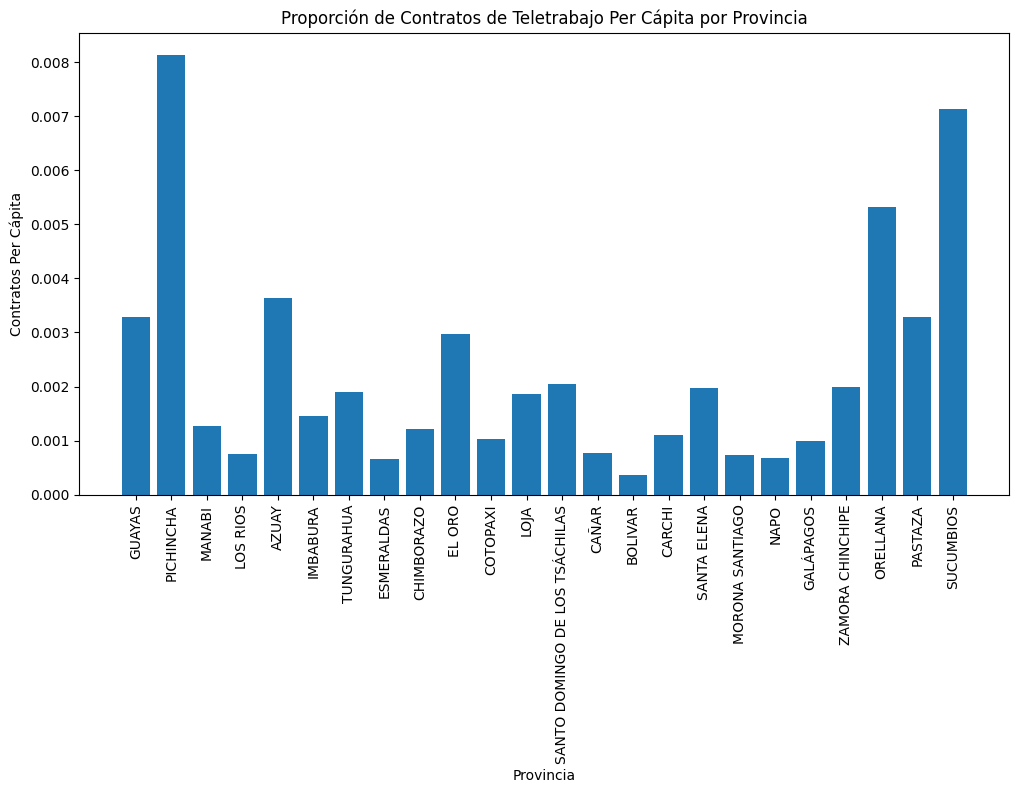

In [99]:
import matplotlib.pyplot as plt

# Ordenar el DataFrame por la proporción de contratos per cápita en orden descendente
df_merged = df_merged.sort_values('Poblacion', ascending=False)

# Calcular la proporción de contratos de teletrabajo per cápita
df_merged['Contratos Per Capita'] = df_merged['Contratos'] / df_merged['Poblacion']

# Graficar la proporción de contratos per cápita por provincia
plt.figure(figsize=(12, 6))
plt.bar(df_merged['Provincia'], df_merged['Contratos Per Capita'])
plt.title('Proporción de Contratos de Teletrabajo Per Cápita por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Contratos Per Cápita')
plt.xticks(rotation=90)
plt.show()
